In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score


In [2]:
%cd C:\Users\Faiz\Desktop\Data

C:\Users\Faiz\Desktop\Data


In [3]:
df1=pd.read_csv('50_Startups.csv')
print (df1)


    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42  California  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68    New York  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95  California  146121.95
11  100671.96        91790.61        249744.55     Florida  144259.40
12   93863.75       127320.38        249839.44  California  141585.52
13   91992.39       

In [4]:
x=df1.iloc[:,:-1]
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,California
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,New York
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [5]:
y = df1.iloc[:,-1]
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))
print (x)


[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [0.0000000e+00 1.000

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split (x,y,test_size = 0.2,random_state= 42)
print ('X Shape-',x.shape)
print ('Y Shape-', y.shape)
print ('X_Train Shape-',x_train.shape)
print ('Y_Train Shape-',y_train.shape)
print ('X_Test Shape-',x_test.shape)
print ('Y_Test Shape-',y_test.shape)


X Shape- (50, 6)
Y Shape- (50,)
X_Train Shape- (40, 6)
Y_Train Shape- (40,)
X_Test Shape- (10, 6)
Y_Test Shape- (10,)


In [13]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)
print (lr)


LinearRegression()


In [14]:
y_pred= lr.predict(x_test)
print (y_pred)


[125685.70020548  84338.92317123  99390.93658769  46818.5891386
 128971.45588836  52062.29882119 109174.11382463  99985.25961745
  97162.65075519 115228.18387682]


In [15]:
result = pd.concat([pd.DataFrame(y_pred, columns = ['Prediction']),
                    pd.DataFrame(y_test,columns = ['Y_Test'])], axis =1)
result['Difference']= y_test -y_pred
print (result)


      Prediction Y_Test  Difference
0  125685.700205    NaN         NaN
1   84338.923171    NaN         NaN
2   99390.936588    NaN         NaN
3   46818.589139    NaN         NaN
4  128971.455888    NaN         NaN
5   52062.298821    NaN         NaN
6  109174.113825    NaN         NaN
7   99985.259617    NaN         NaN
8   97162.650755    NaN         NaN
9  115228.183877    NaN         NaN


In [16]:
y_pre= pd.DataFrame(y_pred, columns =['Prediction'])
y_te = pd.DataFrame(y_test,columns= ['Actual'])
x_te = pd.DataFrame(x_test,columns= ['CF','FR','New Y','R&D','Admin','Mark'])
result = pd.concat([x_te,y_te,y_pre], axis =1)
result['Difference'] = y_pre ['Prediction']-y_te['Actual']
display (result)


,CF,FR,New Y,R&D,Admin,Mark,Actual,Prediction,Difference
0,1.0,0.0,0.0,91992.39,135495.07,252664.93,NaN,125685.700205,NaN
1,1.0,0.0,0.0,38558.51,82982.09,174999.30,NaN,84338.923171,NaN
2,0.0,0.0,1.0,61994.48,115641.28,91131.24,NaN,99390.936588,NaN
3,0.0,0.0,1.0,1000.23,124153.04,1903.93,NaN,46818.589139,NaN
4,0.0,0.0,1.0,94657.16,145077.58,282574.31,NaN,128971.455888,NaN
5,0.0,0.0,1.0,542.05,51743.15,0.00,NaN,52062.298821,NaN
6,0.0,0.0,1.0,75328.87,144135.98,134050.07,NaN,109174.113825,NaN
7,1.0,0.0,0.0,64664.71,139553.16,137962.62,NaN,99985.259617,NaN
8,1.0,0.0,0.0,63408.86,129219.61,46085.25,NaN,97162.650755,NaN
9,0.0,1.0,0.0,86419.70,153514.11,0.00,NaN,115228.183877,NaN


In [17]:
accuracy = r2_score(y_test, y_pred)
print (accuracy)


0.8988481687283758


In [19]:
lr.coef_

array([-1.22767929e+03,  1.42750258e+03, -1.99823287e+02,  8.09359318e-01,
       -7.82867439e-02,  2.84635373e-02])

In [20]:
y_fpred= lr.predict(x)
print (y_fpred)


[192212.66545478 187030.55971071 185183.9343701  174140.32762991
 172930.11655406 164924.33544177 155710.36151195 158957.99543863
 150463.49430468 154641.48410324 134995.51177139 138704.12846333
 127759.84928263 125685.70020548 149424.57045843 146216.9435966
 115791.91754095 128971.45588836 129388.42927959 115228.18387682
 115950.05160436 115612.79873557 113555.99633349 109700.5070828
 114259.51926274  99985.25961745 109174.11382463 114078.10758209
  99825.31692068  99841.95049277  99390.93658769  95712.15395364
  97162.65075519  98630.16447031  88531.79037817  92107.93605121
  74651.63335331  91908.32121703  72157.84688137  84338.92317123
  76212.09086727  75271.6148755   70462.8015      59263.17807132
  61283.53057791  46818.5891386   57756.44854216  44044.39972187
  52062.29882119  46774.03661171]


In [21]:
y_fpred= pd.DataFrame(y_fpred, columns =['Prediction'])
result = pd.concat([df1,y_fpred], axis =1)
result['Difference'] = result['Profit'] - result ['Prediction']
display (result)


,R&D Spend,Administration,Marketing Spend,State,Profit,Prediction,Difference
0,165349.20,136897.80,471784.10,New York,192261.83,192212.665455,49.164545
1,162597.70,151377.59,443898.53,California,191792.06,187030.559711,4761.500289
2,153441.51,101145.55,407934.54,Florida,191050.39,185183.934370,5866.455630
3,144372.41,118671.85,383199.62,New York,182901.99,174140.327630,8761.662370
4,142107.34,91391.77,366168.42,California,166187.94,172930.116554,-6742.176554
5,131876.90,99814.71,362861.36,New York,156991.12,164924.335442,-7933.215442
6,134615.46,147198.87,127716.82,California,156122.51,155710.361512,412.148488
7,130298.13,145530.06,323876.68,New York,155752.60,158957.995439,-3205.395439
8,120542.52,148718.95,311613.29,New York,152211.77,150463.494305,1748.275695
9,123334.88,108679.17,304981.62,California,149759.96,154641.484103,-4881.524103


In [22]:
accuracy = r2_score(y, y_fpred)
print (accuracy)


0.9499635752382114


In [23]:
x=x.astype('float64')
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y, exog = x)
reg_ols = reg_ols.fit()
print (reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     171.2
Date:                Tue, 21 May 2024   Prob (F-statistic):           1.14e-27
Time:                        20:37:26   Log-Likelihood:                -525.19
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.062e+04   6806.869      7.436      0.0

In [24]:
x_opt=x[:,[0,1,2,3,5]]
import statsmodels.api as sm
reg_ols = sm.OLS (endog = y, exog =x_opt)
reg_ols = reg_ols.fit()
print (reg_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     216.9
Date:                Tue, 21 May 2024   Prob (F-statistic):           8.77e-29
Time:                        20:42:47   Log-Likelihood:                -525.42
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.681e+04   3130.528     14.954      0.0

In [25]:
x_opt=x[:,[3]]
from sklearn.model_selection import train_test_split
xopt_train,xopt_test,y_train,y_test =train_test_split (x_opt,y,test_size = 0.2,random_state= 42)
print (x_opt.shape)
print ( y.shape)
print (xopt_train.shape)
print (xopt_test.shape)
print (y_train.shape)
print (y_test.shape)


(50, 1)
(50,)
(40, 1)
(10, 1)
(40,)
(10,)


In [26]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(xopt_train,y_train)
print (reg)


LinearRegression()


In [27]:
yopt_pred= reg.predict(xopt_test)
print (yopt_pred)


[127862.20996405  82250.56334619 102255.72078164  50190.4734756
 130136.88190548  49799.36685472 113638.0775288  104535.0534288
 103463.04843113 123105.31102669]


In [28]:
result = pd.concat([pd.DataFrame(yopt_pred, columns =['Prediction']),
                    pd.DataFrame(y_test,columns = ['Y_Test'])], axis =1)
result['Difference']= result['Y_Test'] - result ['Prediction']
print (result)


      Prediction Y_Test Difference
0  127862.209964    NaN        NaN
1   82250.563346    NaN        NaN
2  102255.720782    NaN        NaN
3   50190.473476    NaN        NaN
4  130136.881905    NaN        NaN
5   49799.366855    NaN        NaN
6  113638.077529    NaN        NaN
7  104535.053429    NaN        NaN
8  103463.048431    NaN        NaN
9  123105.311027    NaN        NaN


In [29]:
accuracy = r2_score(y_test, yopt_pred)
print (accuracy)


0.9265108109341951


In [30]:
yfull_pred= reg.predict(x_opt)
print (yfull_pred)


[190480.25107829 188131.54561896 180315.73844483 172574.27208786
 170640.7877067  161907.99094882 164245.6507063  160560.33849815
 152232.86095279 154616.44488025 136330.60130088 135271.16996536
 129459.61990349 127862.20996405 151721.31008683 147095.06455947
 115929.36923955 130136.88190548 127654.58662083 123105.31102669
 114427.65741716 116250.63356326 112499.09836055 106983.05069951
 115102.13665346 104535.0534288  113638.0775288  110888.37211903
 105718.84707519 105338.10326888 102255.72078164 101523.23880648
 103463.04843113  96706.80916997  88966.38421611  88614.65458336
  73804.31462961  86955.17872572  66604.83030328  82250.56334619
  73881.62600648  73146.31858518  69516.78119611  62572.50038466
  68267.78888609  50190.4734756   50459.55667456  49336.66803799
  49799.36685472  49336.66803799]


In [31]:
accuracy = r2_score(y, yfull_pred)
print (accuracy)


0.9464943582068932


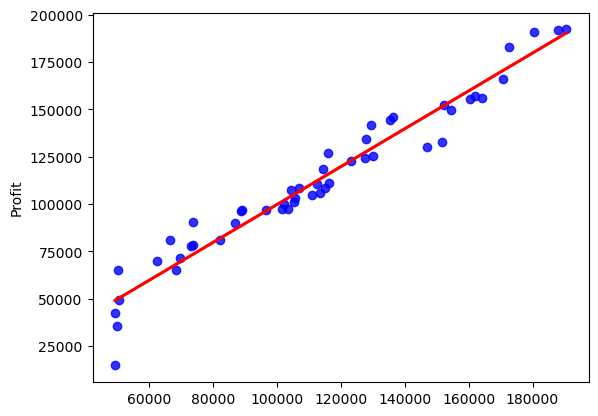

In [32]:
import seaborn as sns
sns.regplot( x = yfull_pred, y = y, scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt.show()


In [34]:
df_Predict=pd.read_csv('50_Startups_Predictions.csv')
print (df_Predict)


    R&D Spend  Administration  Marketing Spend       State
0   120542.52       148718.95        311613.29    New York
1   123334.88       108679.17        304981.62  California
2   101913.08       110594.11        229160.95  California
3   100671.96        91790.61        249744.55     Florida
4    93863.75       127320.38        249839.44  California
5    91992.39       135495.07        252664.93  California
6   119943.24       156547.42        256512.92     Florida
7   114523.61       122616.84        261776.23    New York
8    78013.11       121597.55        264346.06  California
9    72107.60       127864.55        353183.81    New York
10   66051.52       182645.56        118148.20     Florida
11   65605.48       153032.06        107138.38    New York
12   61994.48       115641.28         91131.24    New York
13   61136.38       152701.92         88218.23    New York
14   63408.86       129219.61         46085.25  California
15   55493.95       103057.49        214634.81    New Yo

In [35]:
print (df_Predict.count())

R&D Spend          28
Administration     28
Marketing Spend    28
State              28
dtype: int64


In [36]:
x_Predict = df_Predict.iloc[:,0:1].values
print (x_Predict)

[[120542.52]
 [123334.88]
 [101913.08]
 [100671.96]
 [ 93863.75]
 [ 91992.39]
 [119943.24]
 [114523.61]
 [ 78013.11]
 [ 72107.6 ]
 [ 66051.52]
 [ 65605.48]
 [ 61994.48]
 [ 61136.38]
 [ 63408.86]
 [ 55493.95]
 [ 46426.07]
 [ 46014.02]
 [ 28663.76]
 [ 44069.95]
 [ 20229.59]
 [ 38558.51]
 [ 22177.74]
 [  1000.23]
 [  1315.46]
 [     0.  ]
 [   542.05]
 [     0.  ]]


In [37]:
print (pd.DataFrame(x_Predict))

            0
0   120542.52
1   123334.88
2   101913.08
3   100671.96
4    93863.75
5    91992.39
6   119943.24
7   114523.61
8    78013.11
9    72107.60
10   66051.52
11   65605.48
12   61994.48
13   61136.38
14   63408.86
15   55493.95
16   46426.07
17   46014.02
18   28663.76
19   44069.95
20   20229.59
21   38558.51
22   22177.74
23    1000.23
24    1315.46
25       0.00
26     542.05
27       0.00


In [38]:
yone_Predict= reg.predict(x_Predict )
print (yone_Predict)


[152232.86095279 154616.44488025 136330.60130088 135271.16996536
 129459.61990349 127862.20996405 151721.31008683 147095.06455947
 115929.36923955 110888.37211903 105718.84707519 105338.10326888
 102255.72078164 101523.23880648 103463.04843113  96706.80916997
  88966.38421611  88614.65458336  73804.31462961  86955.17872572
  66604.83030328  82250.56334619  68267.78888609  50190.4734756
  50459.55667456  49336.66803799  49799.36685472  49336.66803799]
